In [ ]:
# Flight delay analysis
# Data time period: 2013 - 2023
# Data source: kaggle.com
#Author: Umaima Afzal 

# GENERAL INFO

# Rows: 171,666
# Columns: 21
# Years Covered: 2013 → 2023 (11 years)
# Months Covered: 1 → 12 (all months)
# Carriers: 21 unique carriers
# iArports: 395 unique airports


# DATA SUMMARY

# Numerical Distributions (selected insights)
# Arriving Flights (arr_flights)
# Mean ≈ 363, but highly skewed (max 21,977 flights at busiest airports).
# Median = 100, showing most airports have relatively few flights.
# Delays ≥15 min (arr_del15)
# Average ≈ 66 per carrier-airport-month.
# Max = 4,176 (severe peaks in busy hubs).
# Cancellations (arr_cancelled)
# Avg ≈ 7.5 per record.
# Extreme case: up to 4,951 cancellations in a month for one carrier-airport.
# Total Arrival Delay (arr_delay)
# Avg ≈ 4,239 minutes (~70 hours).
# Maximum = 438,783 minutes (~305 days).
# Delay Causes (minutes)
# Carrier delays: mean 1,437 mins.
# Weather delays: mean 223 mins.
# NAS delays: mean 921 mins.
# Late aircraft delays: mean 1,652 mins (largest contributor overall).
# Security delays: very small (mean 7 mins).


In [8]:
# Loading Airline_Delay_Cause.csv into Pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# loading the .csv file into a variable for later analysis
df = pd.read_csv("Airline_Delay_Cause.csv")

df.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
5,2023,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1636.0,256.0,55.98,27.81,...,0.0,108.57,32.0,11.0,29768.0,9339.0,4557.0,4676.0,0.0,11196.0
6,2023,8,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",75.0,12.0,5.62,0.97,...,0.0,1.00,0.0,0.0,843.0,535.0,170.0,111.0,0.0,27.0
7,2023,8,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",59.0,7.0,3.32,0.00,...,0.0,3.26,2.0,0.0,324.0,117.0,0.0,25.0,0.0,182.0
8,2023,8,9E,Endeavor Air Inc.,AZO,"Kalamazoo, MI: Kalamazoo/Battle Creek Internat...",62.0,13.0,6.53,0.94,...,0.0,1.99,0.0,0.0,707.0,470.0,77.0,87.0,0.0,73.0
9,2023,8,9E,Endeavor Air Inc.,BDL,"Hartford, CT: Bradley International",30.0,4.0,0.00,0.82,...,0.0,3.18,1.0,0.0,1421.0,0.0,532.0,0.0,0.0,889.0


In [3]:
# Cleanig data
# Replacing missing values with column mean

cleaned_df = df.copy()  # keep original intact
numeric_cols = cleaned_df.select_dtypes(include="number").columns
cleaned_df[numeric_cols] = cleaned_df[numeric_cols].fillna(cleaned_df[numeric_cols].mean())

cleaned_df.head(100)


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.00,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.00,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.00,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.00,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.00,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023,8,AA,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",93.0,37.0,13.00,0.76,...,0.00,8.51,0.0,0.0,1528.0,508.0,29.0,385.0,0.0,606.0
96,2023,8,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",759.0,225.0,67.14,14.76,...,0.21,104.17,16.0,5.0,20112.0,5665.0,950.0,2152.0,11.0,11334.0
97,2023,8,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",1376.0,328.0,92.41,13.89,...,0.55,140.60,11.0,1.0,31197.0,9964.0,2181.0,4350.0,11.0,14691.0
98,2023,8,AA,American Airlines Inc.,AVL,"Asheville, NC: Asheville Regional",165.0,64.0,19.17,5.38,...,0.00,27.08,2.0,0.0,6689.0,2412.0,426.0,511.0,0.0,3340.0


In [4]:

# Unique Airports (code : name)
# This will help us understand data in later part of analysis as if you scroll down you could see airport and carrier codes in graphs

print("=== Unique Airports ===")
unique_airports = cleaned_df[["airport", "airport_name"]].drop_duplicates().sort_values("airport")
for _, row in unique_airports.iterrows():
    print(f"{row['airport']} : {row['airport_name']}")

print("\nTotal unique airports:", unique_airports.shape[0])


# Unique Carriers (code : name)
print("\n=== Unique Carriers ===")
unique_carriers = cleaned_df[["carrier", "carrier_name"]].drop_duplicates().sort_values("carrier")
for _, row in unique_carriers.iterrows():
    print(f"{row['carrier']} : {row['carrier_name']}")

print("\nTotal unique carriers:", unique_carriers.shape[0])


=== Unique Airports ===
ABE : Allentown/Bethlehem/Easton, PA: Lehigh Valley International
ABI : Abilene, TX: Abilene Regional
ABQ : Albuquerque, NM: Albuquerque International Sunport
ABR : Aberdeen, SD: Aberdeen Regional
ABY : Albany, GA: Southwest Georgia Regional
ACK : Nantucket, MA: Nantucket Memorial
ACT : Waco, TX: Waco Regional
ACV : Arcata/Eureka, CA: California Redwood Coast Humboldt County
ACY : Atlantic City, NJ: Atlantic City International
ADK : Adak Island, AK: Adak
ADQ : Kodiak, AK: Kodiak Airport
AEX : Alexandria, LA: Alexandria International
AGS : Augusta, GA: Augusta Regional at Bush Field
AKN : King Salmon, AK: King Salmon Airport
ALB : Albany, NY: Albany International
ALO : Waterloo, IA: Waterloo Regional
ALS : Alamosa, CO: San Luis Valley Regional/Bergman Field
ALW : Walla Walla, WA: Walla Walla Regional
AMA : Amarillo, TX: Rick Husband Amarillo International
ANC : Anchorage, AK: Ted Stevens Anchorage International
APN : Alpena, MI: Alpena County Regional
ART : Water

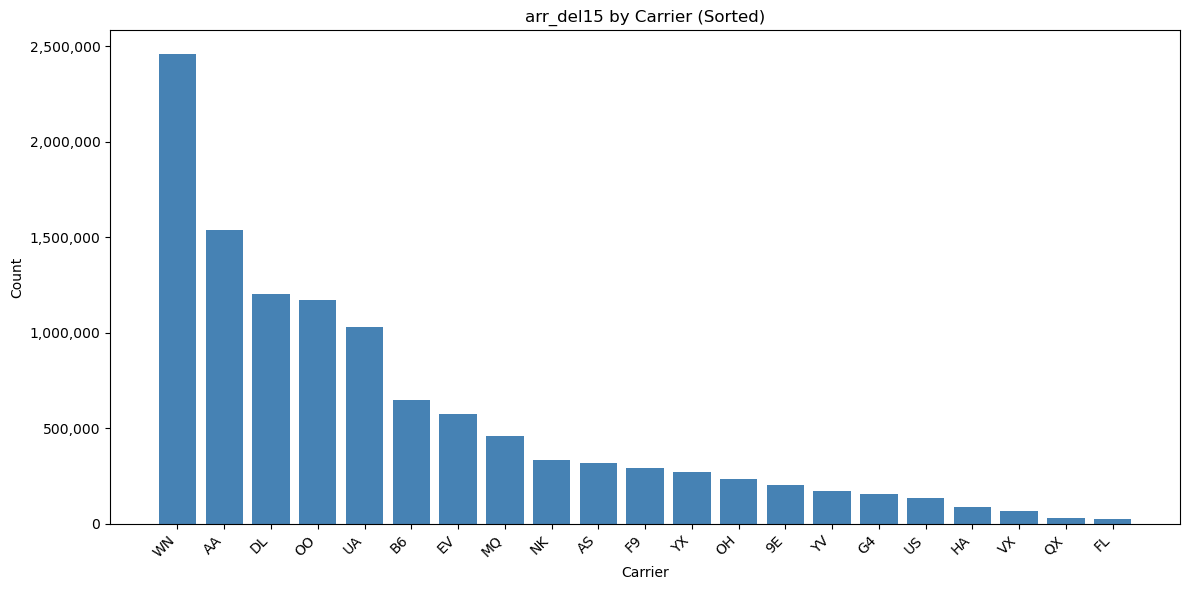

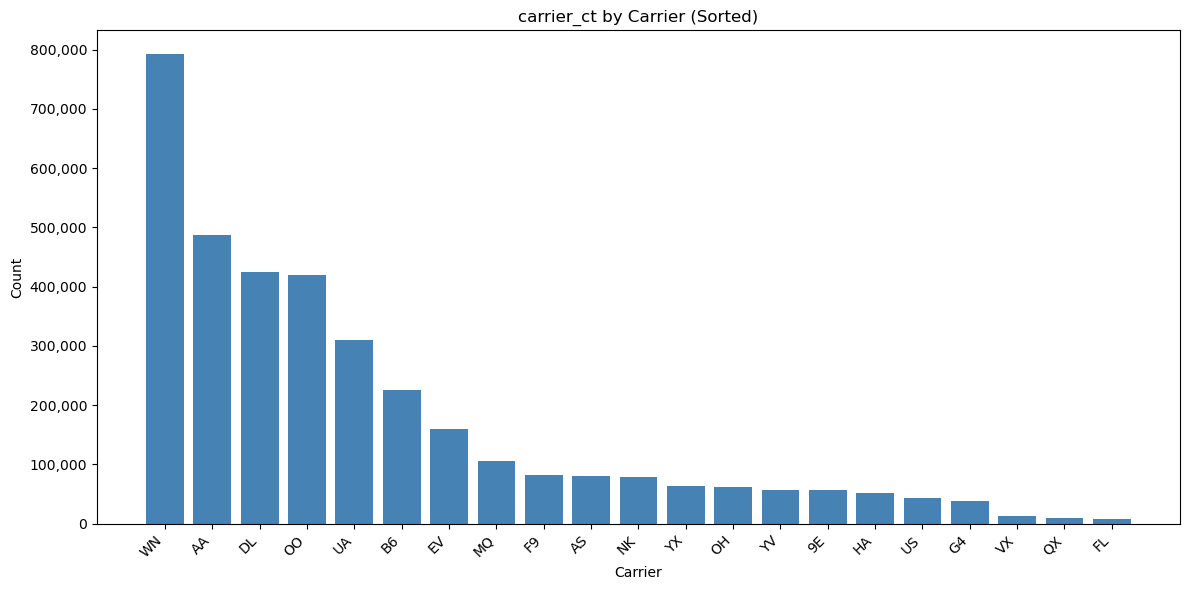

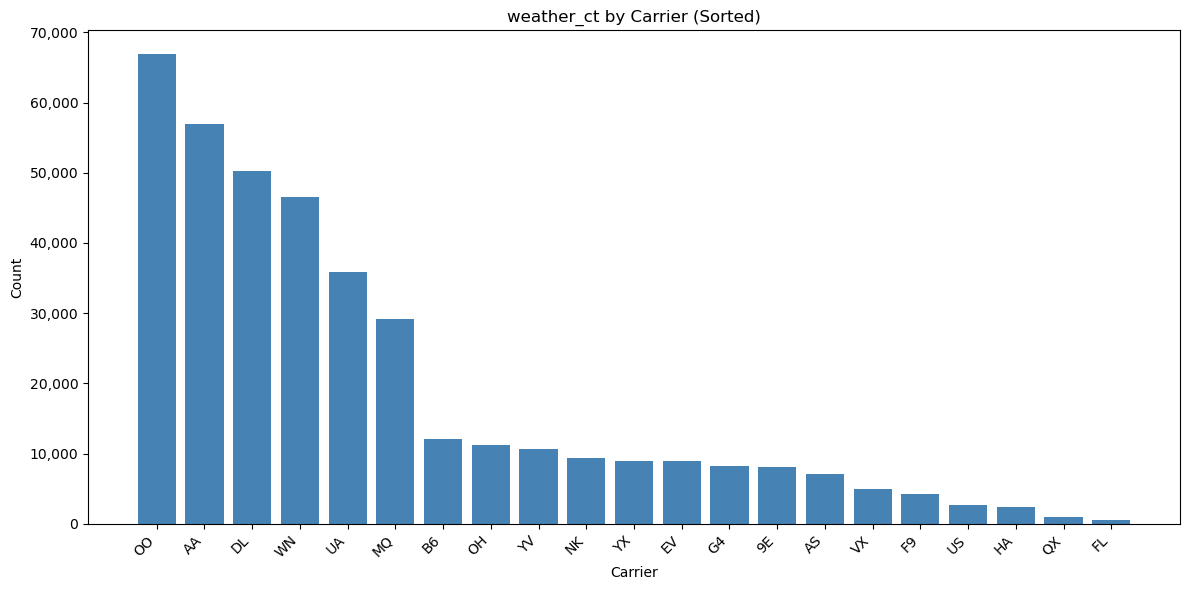

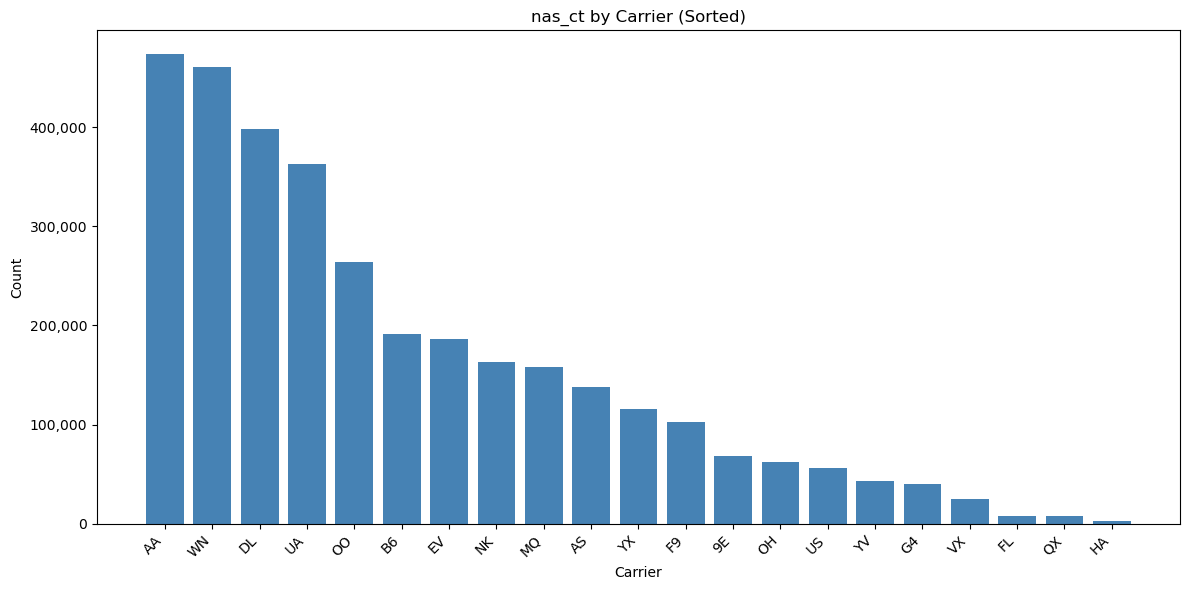

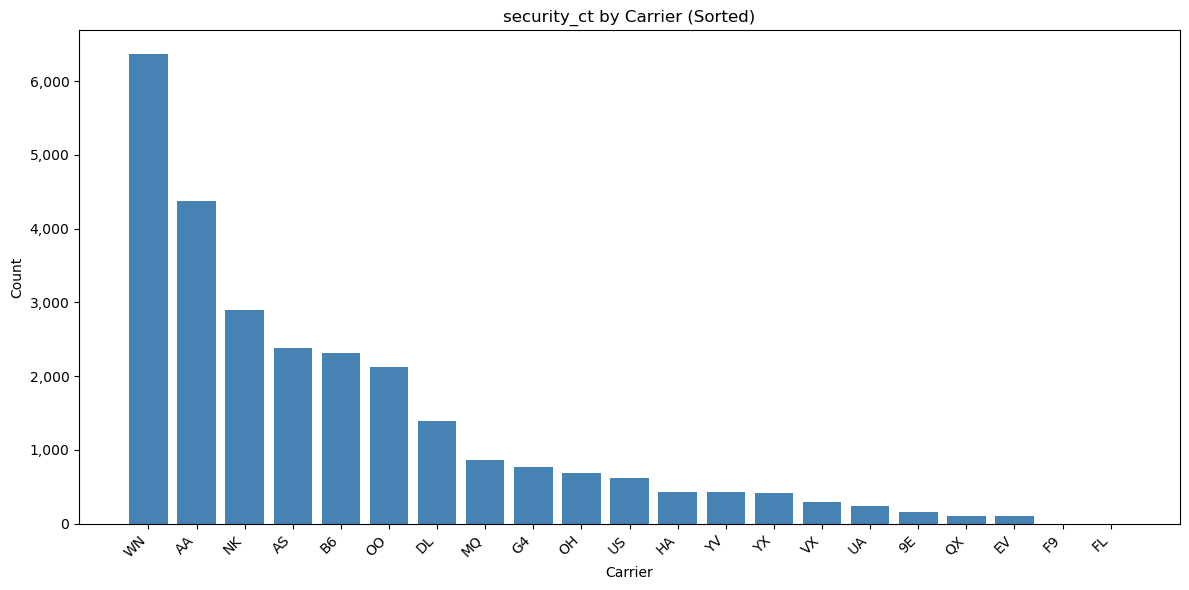

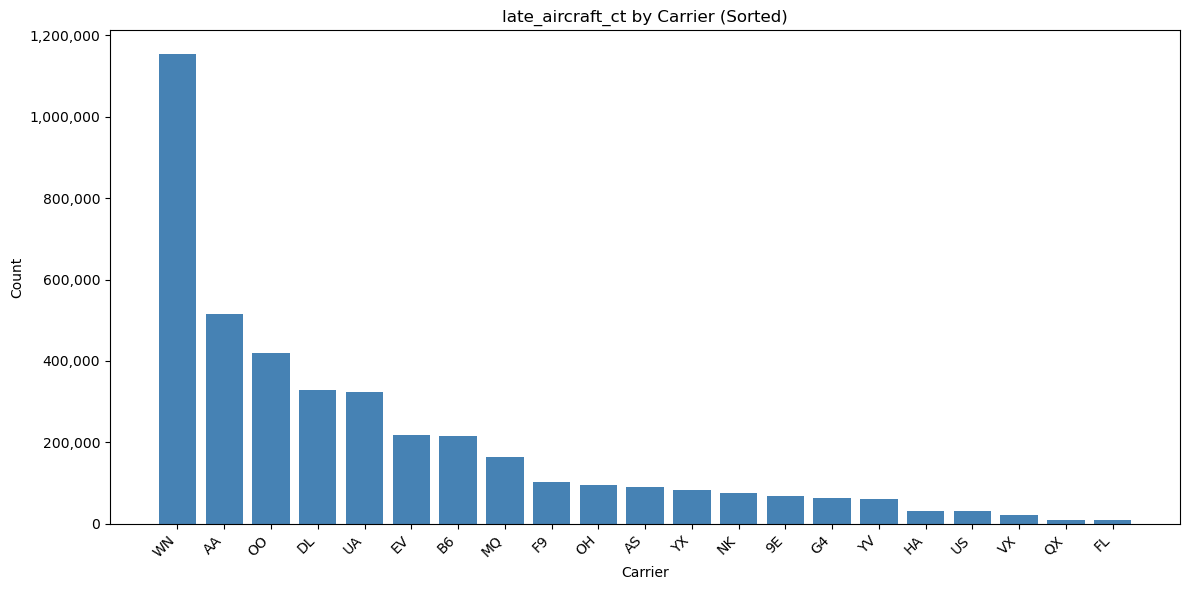

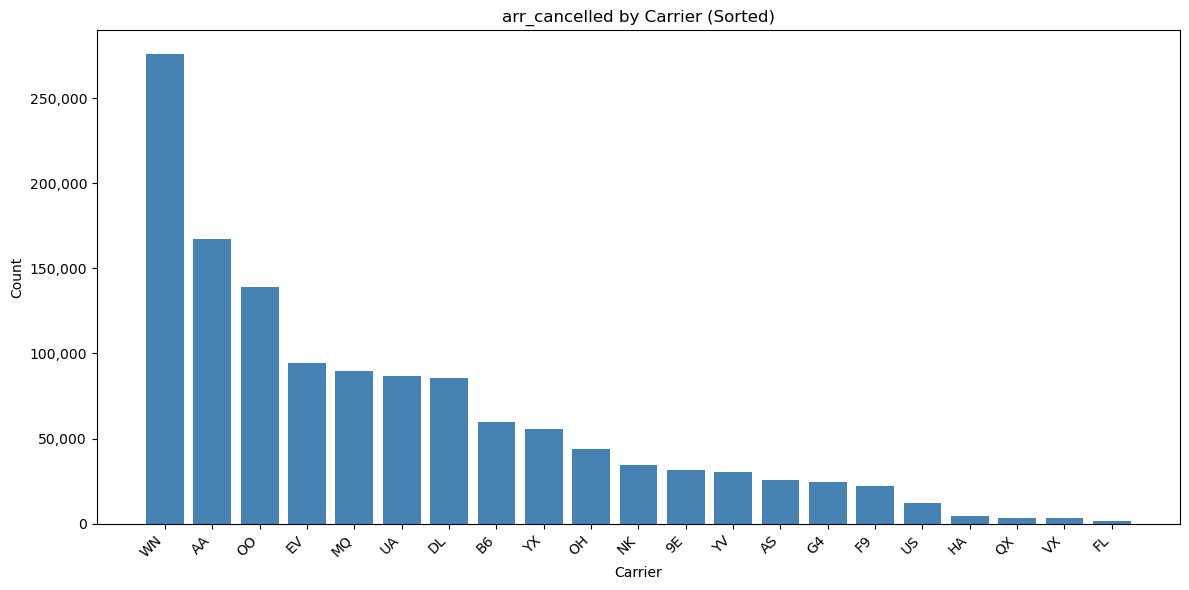

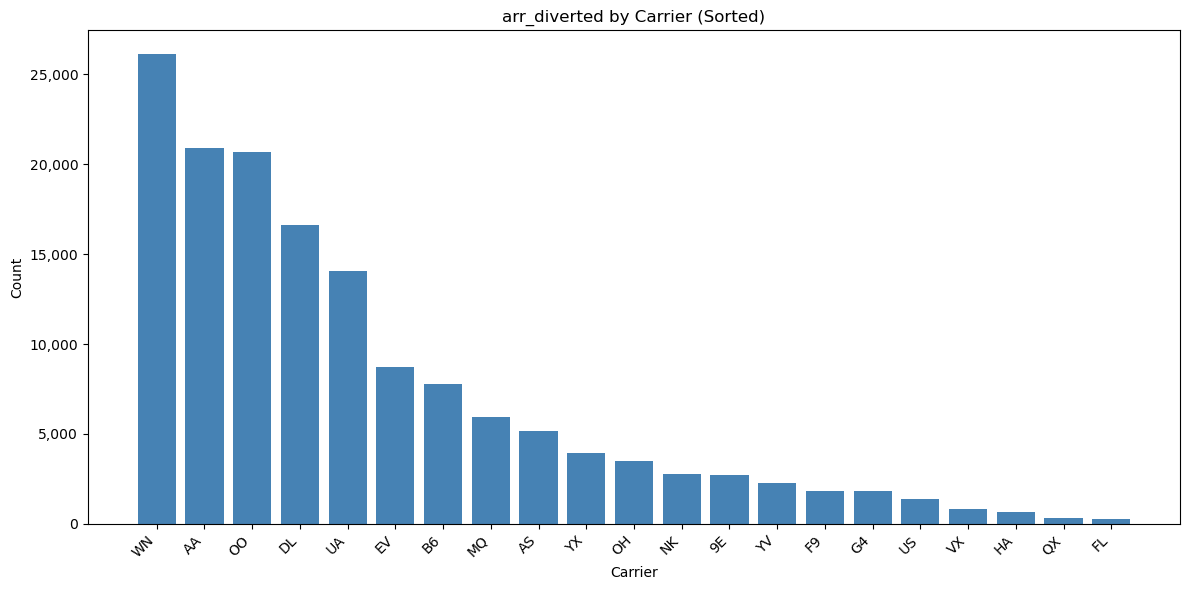

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# comparison of carriers and delaying factors
df2 = cleaned_df.copy()
count_cols = [
    "arr_del15","carrier_ct","weather_ct","nas_ct",
    "security_ct","late_aircraft_ct","arr_cancelled","arr_diverted"
]
carrier_counts = df2.groupby("carrier")[count_cols].sum().reset_index()

for col in count_cols:
    sorted_df = carrier_counts.sort_values(by=col, ascending=False)

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(sorted_df["carrier"], sorted_df[col], color="steelblue")
    ax.set_title(f"{col} by Carrier (Sorted)")
    ax.set_xlabel("Carrier")
    ax.set_ylabel("Count")

    # 🔧 Key lines: disable scientific notation & add thousands separators
    ax.ticklabel_format(style="plain", axis="y", useOffset=False)
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


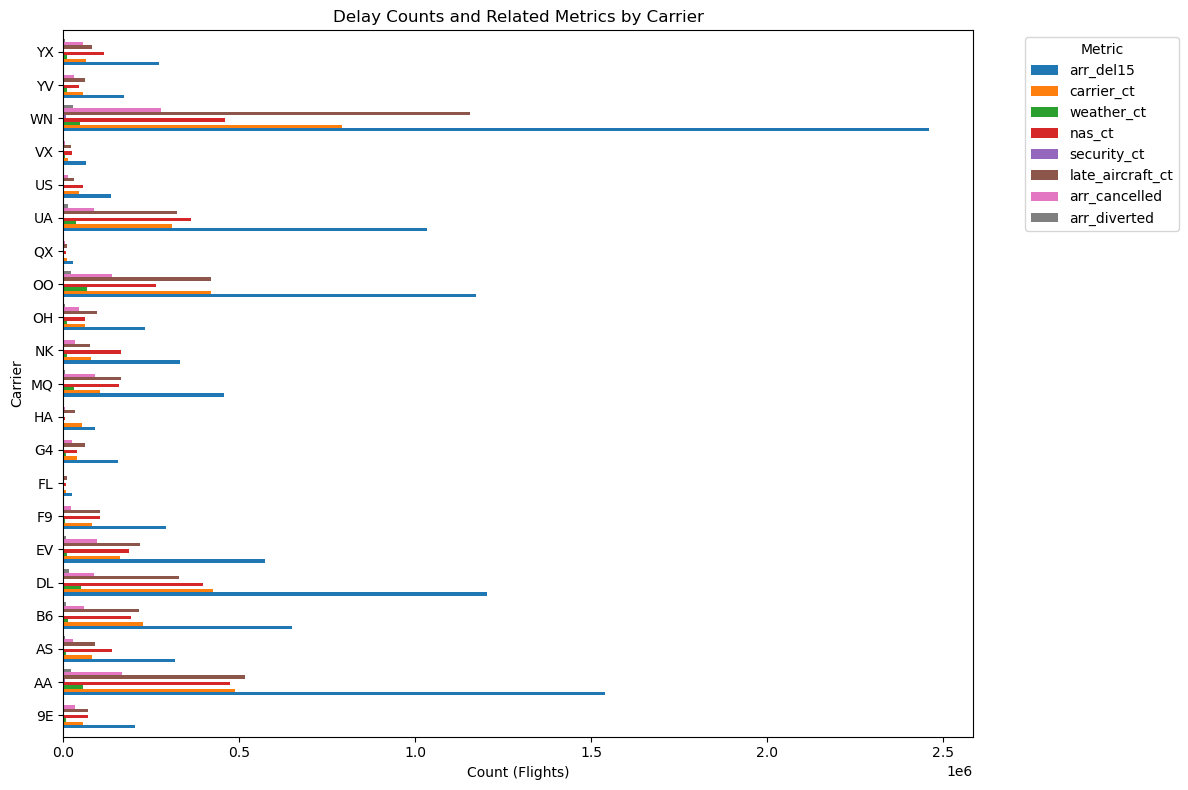

In [6]:


df2 = cleaned_df.copy()

count_cols = [
    "arr_del15",
    "carrier_ct",
    "weather_ct",
    "nas_ct",
    "security_ct",
    "late_aircraft_ct",
    "arr_cancelled",
    "arr_diverted"
]

# Aggregatung
carrier_counts = df2.groupby("carrier")[count_cols].sum().reset_index()

ax = carrier_counts.set_index("carrier").plot(
    kind="barh",
    figsize=(12, 8),
    width=0.8
)

plt.title("Delay Counts and Related Metrics by Carrier")
plt.xlabel("Count (Flights)")
plt.ylabel("Carrier")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


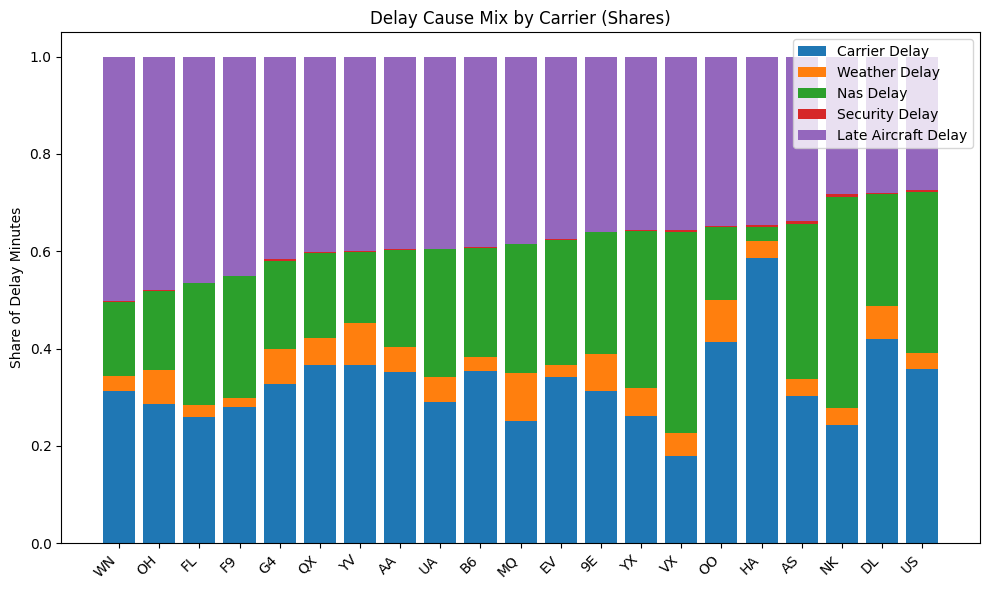

In [13]:
cause_cols = ["carrier_delay","weather_delay","nas_delay","security_delay","late_aircraft_delay"]
mix = (df2.groupby("carrier", as_index=False)[cause_cols].sum())
mix_total = mix[cause_cols].sum(axis=1)
for c in cause_cols:
    mix[c+"_share"] = mix[c] / mix_total

mix_sorted = mix.sort_values("late_aircraft_delay_share", ascending=False)

plt.figure(figsize=(10,6))
bottom = np.zeros(len(mix_sorted))
for c in cause_cols:
    plt.bar(mix_sorted["carrier"], mix_sorted[c+"_share"], bottom=bottom, label=c.replace("_"," ").title())
    bottom += mix_sorted[c+"_share"].to_numpy()
plt.title("Delay Cause Mix by Carrier (Shares)")
plt.ylabel("Share of Delay Minutes")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


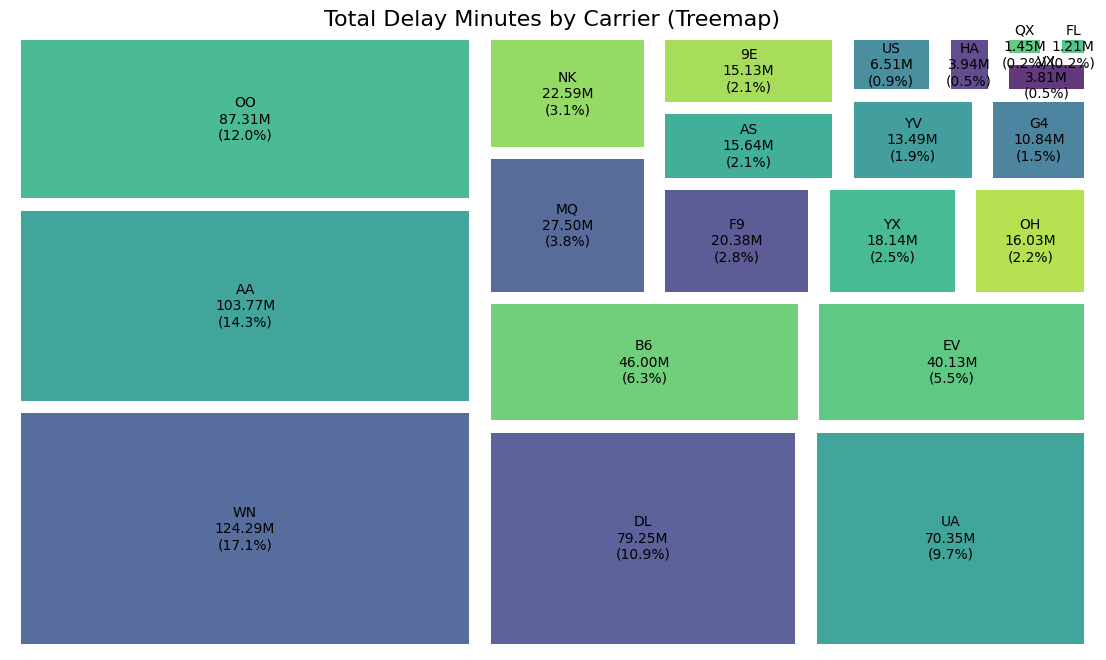

In [ ]:
# for Treemap
# import sys
import numpy as np
# import matplotlib.pyplot as plt

# adding this to identify error in case of squarify doesnt work, using kernel 3.11 now
try:
    import squarify
except ImportError:
    raise SystemExit(
        "squarify is not installed in this kernel.\n"
        f"Install it for THIS Python (3.11) by running:\n\n"
        f'  "{sys.executable}" -m pip install squarify\n\n'
        "If you're in a notebook, you can also run:\n"
        "  %pip install squarify\n"
    )
try:
    df2 = cleaned_df.copy()
except NameError:
    df2 = pd.read_csv("Airline_Delay_Cause.csv")


delay_cols = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
for c in delay_cols:
    df2[c] = pd.to_numeric(df2[c], errors="coerce").fillna(0).clip(lower=0)


agg = df2.groupby("carrier", as_index=False)[delay_cols].sum()
agg["total_delay_minutes"] = agg[delay_cols].sum(axis=1)

agg = agg[agg["total_delay_minutes"] > 0].sort_values("total_delay_minutes", ascending=False).reset_index(drop=True)

total_all = agg["total_delay_minutes"].sum()
labels = [
    f"{row.carrier}\n{row.total_delay_minutes/1e6:.2f}M\n({row.total_delay_minutes/total_all:.1%})"
    for row in agg.itertuples()
]

plt.figure(figsize=(14, 8))
squarify.plot(
    sizes=agg["total_delay_minutes"],
    label=labels,
    alpha=0.85,
    pad=True
)
plt.title("Total Delay Minutes by Carrier (Treemap)", fontsize=16)
plt.axis("off")
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_2828\2734703768.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(cause_list))


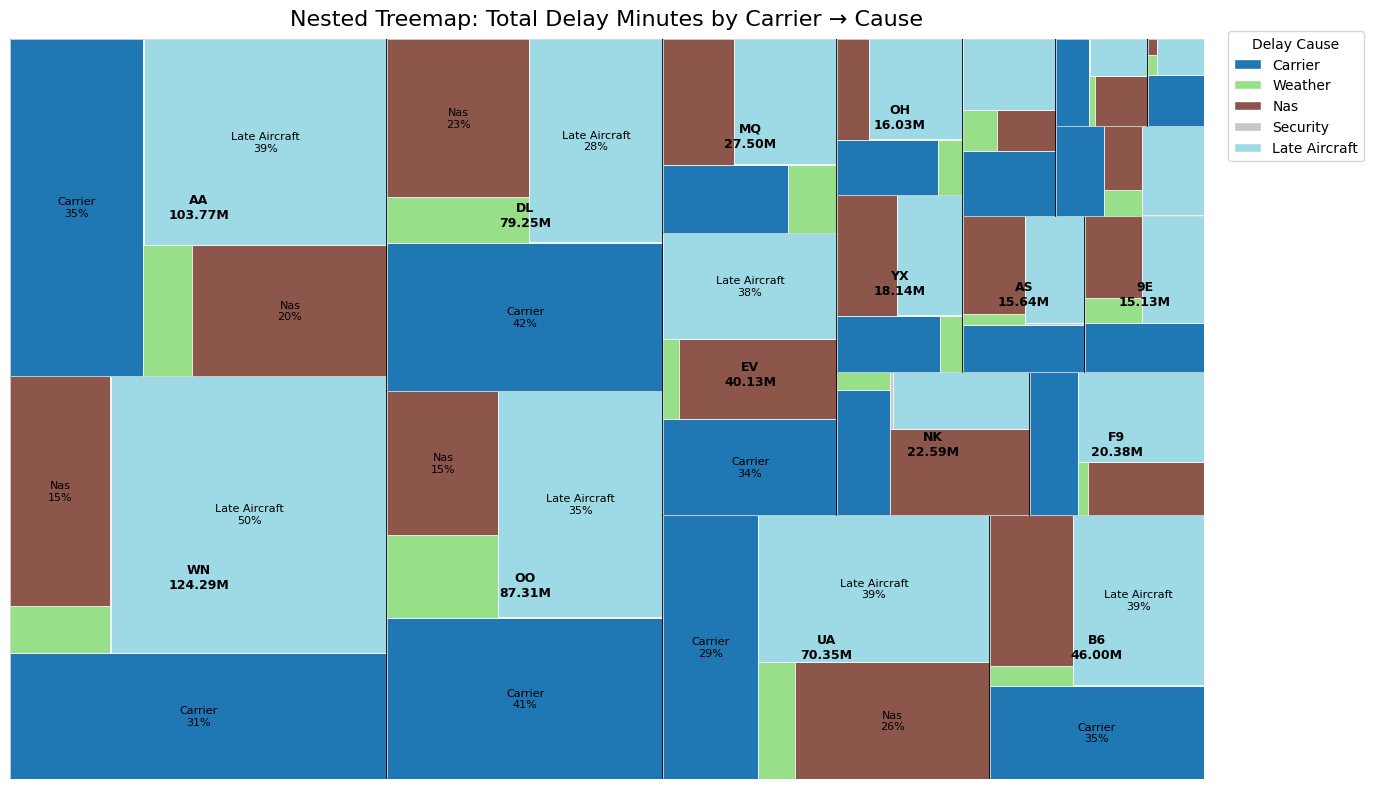

In [27]:
# HIERARCHICAL TREEMAP
# import sys
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.patches as patches

# adding this to identify squarify errors, as experienced with kernel 3.12, using 3.11 right now
try:
    import squarify
except ImportError:
    raise SystemExit(
        "squarify is not installed in this kernel.\n"
        f"Install it for THIS Python by running:\n\n"
        f'  "{sys.executable}" -m pip install squarify\n\n'
        "If you're in a notebook, you can also run:\n"
        "  %pip install squarify\n"
    )
    
try:
    df2 = cleaned_df.copy()
except NameError:
    df2 = pd.read_csv("Airline_Delay_Cause.csv")

delay_cols = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
for c in delay_cols:
    df2[c] = pd.to_numeric(df2.get(c), errors="coerce").fillna(0).clip(lower=0)


long_df = (
    df2
    .groupby("carrier", as_index=False)[delay_cols]
    .sum()
    .melt(id_vars="carrier", value_vars=delay_cols, var_name="cause", value_name="delay_minutes")
)


carrier_totals = long_df.groupby("carrier", as_index=False)["delay_minutes"].sum()
carrier_totals = carrier_totals[carrier_totals["delay_minutes"] > 0].sort_values("delay_minutes", ascending=False)
carriers_order = carrier_totals["carrier"].tolist()

TOP_N = 18
carriers_order = carriers_order[:TOP_N]


long_df = long_df[long_df["carrier"].isin(carriers_order)]


sizes_carrier = carrier_totals.set_index("carrier").loc[carriers_order, "delay_minutes"].values

W, H = 100.0, 62.0
carrier_norm = squarify.normalize_sizes(sizes_carrier, W, H)
carrier_rects = squarify.squarify(carrier_norm, x=0, y=0, dx=W, dy=H)


cause_list = delay_cols  
cmap = plt.cm.get_cmap("tab20", len(cause_list))
cause_color = {cause: cmap(i) for i, cause in enumerate(cause_list)}

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_aspect("equal")
ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.axis("off")


def area(rect):
    return rect["dx"] * rect["dy"]


CARRIER_LABEL_MIN_FRAC = 0.02   # ~2% of total area
CAUSE_LABEL_MIN_FRAC   = 0.015  # ~1.5% of total area

total_area = W * H
carrier_min_area = CARRIER_LABEL_MIN_FRAC * total_area
cause_min_area   = CAUSE_LABEL_MIN_FRAC   * total_area

for carrier, crect in zip(carriers_order, carrier_rects):

    ax.add_patch(
        patches.Rectangle(
            (crect["x"], crect["y"]),
            crect["dx"], crect["dy"],
            linewidth=1.2, edgecolor="black", facecolor="none"
        )
    )

    sub = (long_df[long_df["carrier"] == carrier]
           .set_index("cause")
           .reindex(cause_list)
           .fillna(0.0))
    sizes_causes = sub["delay_minutes"].values


    if sizes_causes.sum() <= 0:
        continue

    sub_norm = squarify.normalize_sizes(sizes_causes, crect["dx"], crect["dy"])
    sub_rects = squarify.squarify(sub_norm, x=crect["x"], y=crect["y"], dx=crect["dx"], dy=crect["dy"])


    for cause, srect in zip(cause_list, sub_rects):
        ax.add_patch(
            patches.Rectangle(
                (srect["x"], srect["y"]),
                srect["dx"], srect["dy"],
                linewidth=0.5, edgecolor="white",
                facecolor=cause_color[cause]
            )
        )

        if area(srect) >= cause_min_area:

            cause_minutes = sub.loc[cause, "delay_minutes"]
            share = cause_minutes / sizes_causes.sum()
            label = f"{cause.replace('_delay','').replace('_',' ').title()}\n{share:.0%}"
            ax.text(
                srect["x"] + srect["dx"] * 0.5,
                srect["y"] + srect["dy"] * 0.5,
                label,
                ha="center", va="center",
                fontsize=8, color="black"
            )

    if area(crect) >= carrier_min_area:

        tot_min = sizes_causes.sum()
        label = f"{carrier}\n{tot_min/1e6:.2f}M"
        ax.text(
            crect["x"] + crect["dx"] * 0.5,
            crect["y"] + crect["dy"] * 0.5,
            label,
            ha="center", va="center",
            fontsize=9, fontweight="bold", color="black"
        )

ax.set_title("Nested Treemap: Total Delay Minutes by Carrier → Cause", fontsize=16, pad=10)


legend_handles = [
    patches.Patch(facecolor=cause_color[c], edgecolor="white", label=c.replace("_delay","").replace("_"," ").title())
    for c in cause_list
]
leg = ax.legend(
    handles=legend_handles,
    loc="upper right", bbox_to_anchor=(1.14, 1.02),
    title="Delay Cause"
)

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_2828\2139348782.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(cause_list))


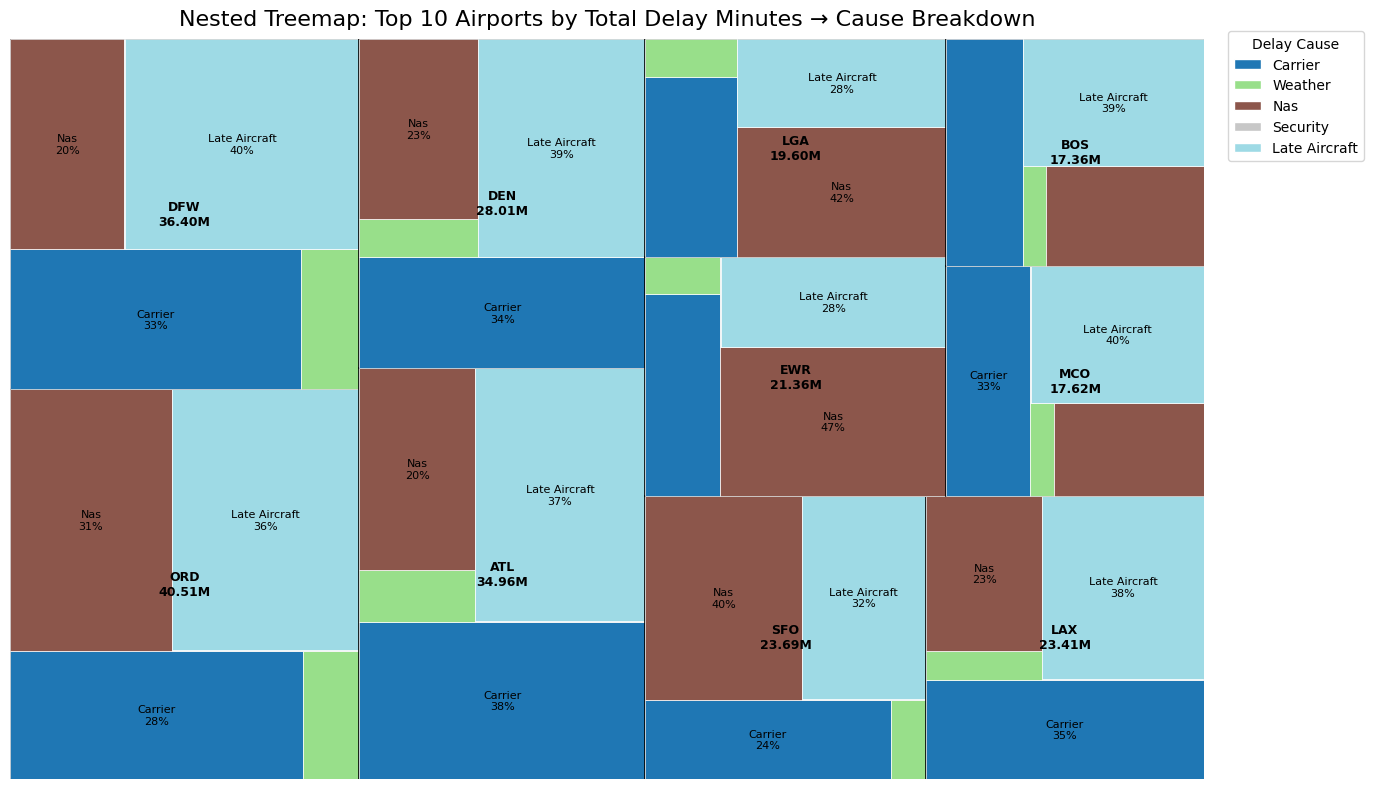

In [28]:
# HIERARCHICAL TREEMAP: Top 10 Airports (outer) 
# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

try:
    import squarify
except ImportError:
    raise SystemExit(
        "squarify is not installed in this kernel.\n"
        f"Install it for THIS Python by running:\n\n"
        f'  "{sys.executable}" -m pip install squarify\n\n'
        "If you're in a notebook, you can also run:\n"
        "  %pip install squarify\n"
    )

try:
    df2 = cleaned_df.copy()
except NameError:
    df2 = pd.read_csv("Airline_Delay_Cause.csv")

delay_cols = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
for c in delay_cols:
    df2[c] = pd.to_numeric(df2.get(c), errors="coerce").fillna(0).clip(lower=0)

long_df = (
    df2
    .groupby("airport", as_index=False)[delay_cols]
    .sum()
    .melt(id_vars="airport", value_vars=delay_cols, var_name="cause", value_name="delay_minutes")
)

airport_totals = long_df.groupby("airport", as_index=False)["delay_minutes"].sum()
airport_totals = airport_totals.sort_values("delay_minutes", ascending=False)
TOP_N = 10
top_airports = airport_totals.head(TOP_N)["airport"].tolist()

long_df = long_df[long_df["airport"].isin(top_airports)]
airport_totals = airport_totals[airport_totals["airport"].isin(top_airports)]

airports_order = airport_totals.sort_values("delay_minutes", ascending=False)["airport"].tolist()
sizes_airport = airport_totals.set_index("airport").loc[airports_order, "delay_minutes"].values

W, H = 100.0, 62.0  # canvas size
airport_norm = squarify.normalize_sizes(sizes_airport, W, H)
airport_rects = squarify.squarify(airport_norm, x=0, y=0, dx=W, dy=H)

cause_list = delay_cols
cmap = plt.cm.get_cmap("tab20", len(cause_list))
cause_color = {cause: cmap(i) for i, cause in enumerate(cause_list)}

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_aspect("equal")
ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.axis("off")

def area(rect): return rect["dx"] * rect["dy"]

AIRPORT_LABEL_MIN_FRAC = 0.03   # ~3% of total area
CAUSE_LABEL_MIN_FRAC   = 0.02   # ~2% of total area
total_area = W * H
airport_min_area = AIRPORT_LABEL_MIN_FRAC * total_area
cause_min_area   = CAUSE_LABEL_MIN_FRAC   * total_area

for airport, a_rect in zip(airports_order, airport_rects):

    ax.add_patch(
        patches.Rectangle(
            (a_rect["x"], a_rect["y"]),
            a_rect["dx"], a_rect["dy"],
            linewidth=1.2, edgecolor="black", facecolor="none"
        )
    )


    sub = (long_df[long_df["airport"] == airport]
           .set_index("cause")
           .reindex(cause_list)
           .fillna(0.0))
    sizes_causes = sub["delay_minutes"].values
    if sizes_causes.sum() <= 0:
        continue

    sub_norm = squarify.normalize_sizes(sizes_causes, a_rect["dx"], a_rect["dy"])
    sub_rects = squarify.squarify(sub_norm, x=a_rect["x"], y=a_rect["y"], dx=a_rect["dx"], dy=a_rect["dy"])

    for cause, s_rect in zip(cause_list, sub_rects):
        ax.add_patch(
            patches.Rectangle(
                (s_rect["x"], s_rect["y"]),
                s_rect["dx"], s_rect["dy"],
                linewidth=0.5, edgecolor="white",
                facecolor=cause_color[cause]
            )
        )
     
        if area(s_rect) >= cause_min_area:
            cause_minutes = sub.loc[cause, "delay_minutes"]
            share = cause_minutes / sizes_causes.sum()
            label = f"{cause.replace('_delay','').replace('_',' ').title()}\n{share:.0%}"
            ax.text(
                s_rect["x"] + s_rect["dx"] * 0.5,
                s_rect["y"] + s_rect["dy"] * 0.5,
                label, ha="center", va="center",
                fontsize=8, color="black"
            )

    if area(a_rect) >= airport_min_area:
        tot_min = sizes_causes.sum()
        label = f"{airport}\n{tot_min/1e6:.2f}M"
        ax.text(
            a_rect["x"] + a_rect["dx"] * 0.5,
            a_rect["y"] + a_rect["dy"] * 0.5,
            label, ha="center", va="center",
            fontsize=9, fontweight="bold", color="black"
        )

ax.set_title("Nested Treemap: Top 10 Airports by Total Delay Minutes → Cause Breakdown",
             fontsize=16, pad=10)

legend_handles = [
    patches.Patch(facecolor=cause_color[c], edgecolor="white",
                  label=c.replace("_delay","").replace("_"," ").title())
    for c in cause_list
]
ax.legend(handles=legend_handles, loc="upper right", bbox_to_anchor=(1.14, 1.02),
          title="Delay Cause")

plt.tight_layout()
plt.show()


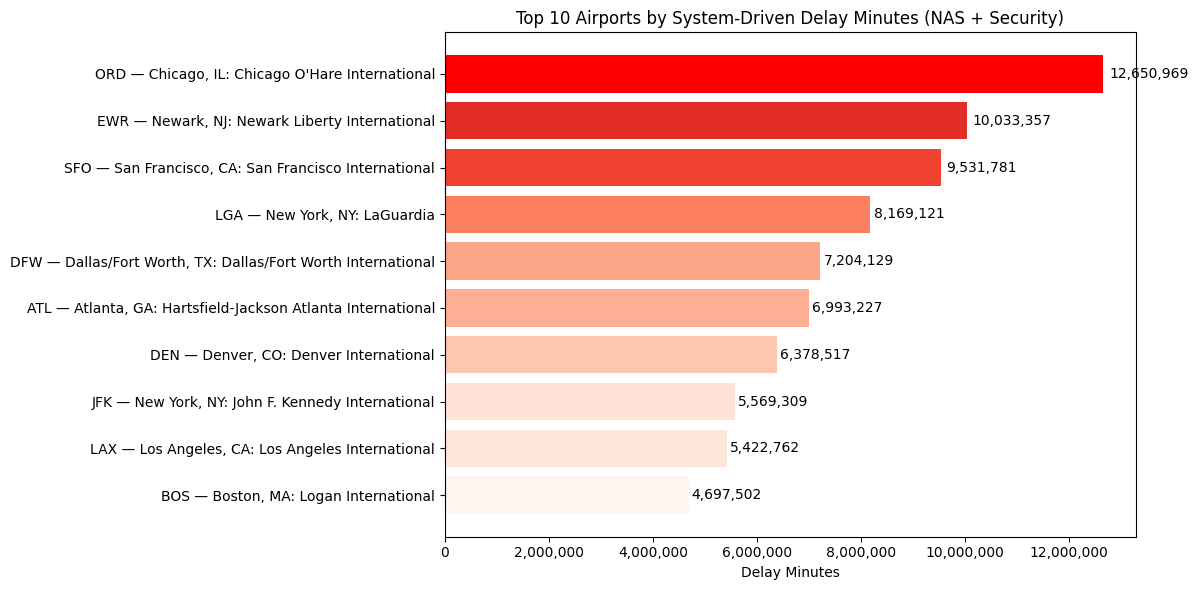

In [29]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


try:
    df2 = cleaned_df.copy()
except NameError:
    df2 = pd.read_csv("Airline_Delay_Cause.csv")


for c in ["nas_delay", "security_delay"]:
    df2[c] = pd.to_numeric(df2.get(c), errors="coerce").fillna(0).clip(lower=0)

df2["system_delay"] = df2["nas_delay"] + df2["security_delay"]

group_cols = ["airport", "airport_name"] if "airport_name" in df2.columns else ["airport"]
top = (df2.groupby(group_cols, as_index=False)["system_delay"]
         .sum()
         .sort_values("system_delay", ascending=False)
         .head(10))

if "airport_name" in top.columns:
    top["label"] = top["airport"] + " — " + top["airport_name"]
else:
    top["label"] = top["airport"]

vals = top["system_delay"].to_numpy()
norm = (vals - vals.min()) / (vals.max() - vals.min() + 1e-9)

cmap = plt.cm.Reds
colors = [cmap(v) for v in norm]

colors[0] = (1.0, 0.0, 0.0, 1.0)

plt.figure(figsize=(12, 6))
y_pos = np.arange(len(top))[::-1]  

plt.barh(y_pos, top["system_delay"], color=colors, edgecolor="none")
plt.yticks(y_pos, top["label"])
plt.title("Top 10 Airports by System-Driven Delay Minutes (NAS + Security)")
plt.xlabel("Delay Minutes")

ax = plt.gca()
ax.ticklabel_format(style="plain", axis="x", useOffset=False)
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

for i, (y, v) in enumerate(zip(y_pos, top["system_delay"])):
    plt.text(v * 1.01, y, f"{v:,.0f}", va="center")

plt.tight_layout()
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

try:
    df = cleaned_df.copy()
except NameError:
    df = pd.read_csv("Airline_Delay_Cause.csv")

for c in ["arr_flights", "arr_del15"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df[df["arr_flights"] > 0].copy()

df["date"] = pd.to_datetime(df["year"].astype(int).astype(str) + "-" +
                            df["month"].astype(int).astype(str) + "-01")
df = df.sort_values(["carrier", "airport", "date"])

df["delay_rate"] = (df["arr_del15"] / df["arr_flights"]).clip(0, 1)
THRESH = 0.20
df["y_high_delay"] = (df["delay_rate"] >= THRESH).astype(int)

df["lag1_delay_rate"] = (
    df.groupby(["carrier", "airport"])["delay_rate"]
      .shift(1)
)

df["lag1_delay_rate"] = df["lag1_delay_rate"].fillna(df["delay_rate"].mean())

numeric_features = ["arr_flights", "year", "lag1_delay_rate"]
categorical_features = ["month", "carrier", "airport"]

X = df[numeric_features + categorical_features]
y = df["y_high_delay"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

def log1p_col(col):
    return np.log1p(col)

numeric_transformer = Pipeline(steps=[
    ("impute", FunctionTransformer(lambda a: np.nan_to_num(a, nan=np.nanmean(a)), accept_sparse=False)),
    ("log_flights", ColumnTransformer(
        transformers=[("log1p_arr_flights", FunctionTransformer(log1p_col), [0])],
        remainder="passthrough"
    )),
    ("scaler", StandardScaler())
])

X_train_ = X_train.copy()
X_test_ = X_test.copy()
X_train_["arr_flights"] = np.log1p(X_train_["arr_flights"])
X_test_["arr_flights"] = np.log1p(X_test_["arr_flights"])

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    ],
    remainder="drop"
)

logreg = LogisticRegression(
    solver="saga",          
    penalty="l2",
    max_iter=1000,
    class_weight="balanced",   
    n_jobs=None
)

clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", logreg)
])

clf.fit(X_train_, y_train)

y_prob = clf.predict_proba(X_test_)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_prob).round(3))
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))

ohe = clf.named_steps["prep"].named_transformers_["cat"]
num_names = numeric_features
cat_names = ohe.get_feature_names_out(categorical_features).tolist()
feature_names = num_names + cat_names

coefs = pd.Series(clf.named_steps["model"].coef_.ravel(), index=feature_names)
print("\nTop positive features (increase odds of high-delay):")
print(coefs.sort_values(ascending=False).head(15))
print("\nTop negative features (decrease odds of high-delay):")
print(coefs.sort_values().head(15))


ROC-AUC: 0.801

Classification report:
              precision    recall  f1-score   support

           0      0.804     0.743     0.772     20913
           1      0.642     0.718     0.678     13421

    accuracy                          0.733     34334
   macro avg      0.723     0.731     0.725     34334
weighted avg      0.741     0.733     0.736     34334


Top positive features (increase odds of high-delay):
airport_UIN        1.285774
airport_CIC        1.261445
airport_CDB        1.234932
airport_LGA        1.230348
airport_SFB        1.109952
airport_EWR        1.082163
airport_AZA        1.063588
month_6            1.040830
airport_MOD        1.011299
lag1_delay_rate    0.962308
month_12           0.867816
airport_SFO        0.851039
airport_OTH        0.816440
airport_CEC        0.814931
airport_PGD        0.795884
dtype: float64

Top negative features (decrease odds of high-delay):
airport_EKO   -1.820037
airport_SPN   -1.679552
airport_PIH   -1.436802
airport_SUN   -1.28

In [19]:
# These are log-odds effects from the logistic regression .
# Positive = higher odds of a high-delay month. Negative = lower odds.

# Airports strongly associated with higher delay risk (examples):
# UIN, CIC, CDB, LGA, EWR, SFB, AZA, MOD, SFO, OTH, CEC, PGD.
# Practical read: certain airports (not just the biggest hubs) systematically see more high-delay months.

# Airports associated with lower delay risk (examples):
# EKO, SPN, PIH, SUN, LWS, BRD, VCT, BTM, IMT, WYS, HIB, BJI, SWO.
# Practical read: these tend to have fewer high-delay months.

# Seasonality:

# month_6 (June) and month_12 (December) push risk up.

# month_9 (September) pushes risk down.
# Practical read: peak summer and holiday periods are harder; September is relatively smoother.

# Persistence:

# lag1_delay_rate is positive → a bad month raises the odds the next month will also be bad.
# Practical read: delays “carry momentum”—use last month’s performance as an early warning signal.

In [ ]:

# Random Forest: High-Delay Month Prediction
# import pandas as pd
# import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix
)

try:
    df = cleaned_df.copy()
except NameError:
    df = pd.read_csv("Airline_Delay_Cause.csv")

for c in ["arr_flights", "arr_del15", "year", "month"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df[df["arr_flights"] > 0].copy()

df["date"] = pd.to_datetime(
    df["year"].astype(int).astype(str) + "-" + df["month"].astype(int).astype(str) + "-01"
)
df = df.sort_values(["carrier", "airport", "date"])

df["delay_rate"] = (df["arr_del15"] / df["arr_flights"]).clip(0, 1)
THRESH = 0.20          
df["y_high_delay"] = (df["delay_rate"] >= THRESH).astype(int)

df["lag1_delay_rate"] = (
    df.groupby(["carrier", "airport"])["delay_rate"].shift(1)
)

df["lag1_delay_rate"] = df["lag1_delay_rate"].fillna(df["delay_rate"].mean())

numeric_features = ["arr_flights", "year", "lag1_delay_rate"]
categorical_features = ["month", "carrier", "airport"]

X = df[numeric_features + categorical_features].copy()
y = df["y_high_delay"].copy()

X["arr_flights"] = np.log1p(X["arr_flights"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    ],
    remainder="passthrough"   
)

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,        
    min_samples_leaf=10,     
    n_jobs=-1,
    class_weight="balanced",
    random_state=42
)

clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", rf)
])

clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.50).astype(int)

print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

ohe = clf.named_steps["prep"].named_transformers_["cat"]
cat_names = ohe.get_feature_names_out(categorical_features).tolist()
feature_names = cat_names + numeric_features  

importances = clf.named_steps["model"].feature_importances_

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nTop 25 feature importances:")
print(fi.head(25))

def group_sum_importance(series, prefixes):
    out = {}
    for p in prefixes:
        out[p] = series[[i for i in series.index if i.startswith(p)]].sum()
    return pd.Series(out).sort_values(ascending=False)

grouped = group_sum_importance(fi, ["carrier_", "airport_", "month_"])
grouped["arr_flights(log1p)"] = fi["arr_flights"]
grouped["year"] = fi["year"]
grouped["lag1_delay_rate"] = fi["lag1_delay_rate"]
print("\nGrouped importances (rough, by field):")
print(grouped.sort_values(ascending=False))



ROC-AUC: 0.839

Classification report:
              precision    recall  f1-score   support

           0      0.825     0.766     0.794     20913
           1      0.672     0.747     0.708     13421

    accuracy                          0.759     34334
   macro avg      0.749     0.757     0.751     34334
weighted avg      0.765     0.759     0.761     34334

Confusion matrix:
 [[16021  4892]
 [ 3396 10025]]

Top 25 feature importances:
lag1_delay_rate    0.448501
year               0.092454
carrier_DL         0.058082
month_9            0.040189
month_6            0.036228
arr_flights        0.029230
month_12           0.025137
month_7            0.019333
carrier_9E         0.017441
carrier_B6         0.016645
carrier_F9         0.016386
month_10           0.014254
month_11           0.013629
carrier_AS         0.011433
carrier_OO         0.010016
carrier_WN         0.009947
carrier_AA         0.009068
month_8            0.008813
month_3            0.008349
month_4            0.00

In [ ]:
# import pandas as pd
# import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report


try:
    df = cleaned_df.copy()
except NameError:
    df = pd.read_csv("Airline_Delay_Cause.csv")

for c in ["arr_flights", "arr_del15", "year", "month"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df = df[df["arr_flights"] > 0].copy()

df["date"] = pd.to_datetime(df["year"].astype(int).astype(str) + "-" +
                            df["month"].astype(int).astype(str) + "-01")
df = df.sort_values(["carrier", "airport", "date"])

df["delay_rate"] = (df["arr_del15"] / df["arr_flights"]).clip(0, 1)
THRESH = 0.20
df["y_high_delay"] = (df["delay_rate"] >= THRESH).astype(int)

df["lag1_delay_rate"] = df.groupby(["carrier", "airport"])["delay_rate"].shift(1)
df["lag1_delay_rate"] = df["lag1_delay_rate"].fillna(df["delay_rate"].mean())

numeric_features = ["arr_flights", "year", "lag1_delay_rate"]
categorical_features = ["month", "carrier", "airport"]

X = df[numeric_features + categorical_features].copy()
y = df["y_high_delay"].copy()

X["arr_flights"] = np.log1p(X["arr_flights"])

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    ],
    remainder="passthrough"  # numeric features pass through at the end
)

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=10,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42
)

clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", rf)
])

clf.fit(X, y)

last_year = int(df["year"].max())   
next_year = last_year + 1           
target_month = 9                    
target_carrier = "WN"

wn_hist = df[df["carrier"] == target_carrier].copy()
if wn_hist.empty:
    raise ValueError("No history found for carrier 'WN' in the dataset.")

last_delay_rate = (
    wn_hist.sort_values(["airport", "date"])
           .groupby("airport")["delay_rate"]
           .last()
)

def median_last_k(s, k=6):
    return s.tail(k).median()

flights_median = (
    wn_hist.sort_values(["airport", "date"])
           .groupby("airport")["arr_flights"]
           .apply(lambda s: median_last_k(s, k=6))
)

future_airports = sorted(wn_hist["airport"].unique().tolist())
future = pd.DataFrame({
    "airport": future_airports,
    "carrier": target_carrier,
    "month": target_month,
    "year": next_year,
})

future = future.merge(last_delay_rate.rename("lag1_delay_rate"), on="airport", how="left")
future = future.merge(flights_median.rename("arr_flights"), on="airport", how="left")

future["lag1_delay_rate"] = future["lag1_delay_rate"].fillna(df["delay_rate"].mean())
future["arr_flights"] = future["arr_flights"].fillna(df["arr_flights"].median())

future_X = future[numeric_features + categorical_features].copy()
future_X["arr_flights"] = np.log1p(future_X["arr_flights"])

future["p_high_delay"] = clf.predict_proba(future_X)[:, 1]
future["pred_label_0.50"] = (future["p_high_delay"] >= 0.50).astype(int)

future_sorted = future.sort_values("p_high_delay", ascending=False).reset_index(drop=True)

print(f"Predicted high-delay risk for WN — September {next_year}")
print(future_sorted[["airport", "year", "month", "lag1_delay_rate", "arr_flights", "p_high_delay", "pred_label_0.50"]].head(20))



Predicted high-delay risk for WN — September 2024
   airport  year  month  lag1_delay_rate  arr_flights  p_high_delay  \
0      EWR  2024      9         0.400000        432.0      0.715765   
1      SFO  2024      9         0.336788        753.0      0.679027   
2      BOS  2024      9         0.352066        513.0      0.667925   
3      DTW  2024      9         0.337989        323.0      0.655385   
4      BDL  2024      9         0.334294        331.0      0.654423   
5      MIA  2024      9         0.293598        512.5      0.651357   
6      SJU  2024      9         0.319403        336.0      0.651315   
7      ALB  2024      9         0.342949        285.0      0.650695   
8      BUF  2024      9         0.312169        374.5      0.648927   
9      MHT  2024      9         0.318182        247.5      0.644506   
10     TUS  2024      9         0.306502        311.5      0.643866   
11     ORF  2024      9         0.296875        231.0      0.637023   
12     CVG  2024      9    

In [22]:
# airport: the airport code we’re scoring.

# lag1_delay_rate: the most recent observed delay rate for WN at that airport (acts as “momentum”).

# arr_flights: an estimate of WN’s flights we used (median of recent months).

# p_high_delay: the model’s probability that September 2024 will be a high-delay month at that airport.

# pred_label_0.50: the class after applying a 0.50 threshold (1 = predicted high delay).